### Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CleanedDataUpdated_group19_CE9010_2021.csv')
df.head()

,Img_url,Car Brand,Make & Model,Price,Reg Year,Depreciation,Reg Date,Eng Cap,Mileage,Vechical Type,Status,Unnamed: 11,Unnamed: 12
0,https://i.i sgcm.com/cars_used/202104/984475_s...,Toyota Vellfire,2.4A Z,NaN,2013.0,,26/03/2013,"2,362 cc",,MPV,Available,NaN,NaN
1,https://i.i sgcm.com/cars_used/202104/984466_s...,MINI One,1.2A,"$55,588",2014.0,,22/08/2014,"1,198 cc",,Hatchback,Available,NaN,NaN
2,https://i.i sgcm.com/cars_used/202102/966514_s...,Ssangyong Tivoli,Diesel 1.6A,"$64,900",2017.0,"$9,260 /yr",24/02/2017,"1,597 cc","76,368 km",SUV,Available,NaN,NaN
3,https://i.i sgcm.com/cars_used/202104/985239_s...,Volkswagen Passat,CC 1.8T (COE till 04/2029),"$64,888",2009.0,"$8,060 /yr",22/07/2009,"1,798 cc","201,527 km",Luxury,Available,NaN,NaN
4,https://i.i sgcm.com/cars_used/202104/985237_s...,Mercedes Benz E Class,E200 CGI,"$35,800",2011.0,,19/05/2011,"1,796 cc","205,000 km",Luxury,Available,NaN,NaN


### Data Cleaning

In [3]:
#Reindexing DataFrame so that price feature will at last
df= df.reindex(columns=['Img_url', 'Car Brand', 'Make & Model', 'Depreciation', 'Reg Year',
       'Eng Cap', 'Mileage', 'Vechical Type', 'Status', 'Price'])
df.head()

,Img_url,Car Brand,Make & Model,Depreciation,Reg Year,Eng Cap,Mileage,Vechical Type,Status,Price
0,https://i.i sgcm.com/cars_used/202104/984475_s...,Toyota Vellfire,2.4A Z,,2013.0,"2,362 cc",,MPV,Available,NaN
1,https://i.i sgcm.com/cars_used/202104/984466_s...,MINI One,1.2A,,2014.0,"1,198 cc",,Hatchback,Available,"$55,588"
2,https://i.i sgcm.com/cars_used/202102/966514_s...,Ssangyong Tivoli,Diesel 1.6A,"$9,260 /yr",2017.0,"1,597 cc","76,368 km",SUV,Available,"$64,900"
3,https://i.i sgcm.com/cars_used/202104/985239_s...,Volkswagen Passat,CC 1.8T (COE till 04/2029),"$8,060 /yr",2009.0,"1,798 cc","201,527 km",Luxury,Available,"$64,888"
4,https://i.i sgcm.com/cars_used/202104/985237_s...,Mercedes Benz E Class,E200 CGI,,2011.0,"1,796 cc","205,000 km",Luxury,Available,"$35,800"


#### Remove Irrelevant features

In [4]:
df2=df.copy()
df2=df2.drop(columns=['Img_url'])
df2.head()

,Car Brand,Make & Model,Depreciation,Reg Year,Eng Cap,Mileage,Vechical Type,Status,Price
0,Toyota Vellfire,2.4A Z,,2013.0,"2,362 cc",,MPV,Available,NaN
1,MINI One,1.2A,,2014.0,"1,198 cc",,Hatchback,Available,"$55,588"
2,Ssangyong Tivoli,Diesel 1.6A,"$9,260 /yr",2017.0,"1,597 cc","76,368 km",SUV,Available,"$64,900"
3,Volkswagen Passat,CC 1.8T (COE till 04/2029),"$8,060 /yr",2009.0,"1,798 cc","201,527 km",Luxury,Available,"$64,888"
4,Mercedes Benz E Class,E200 CGI,,2011.0,"1,796 cc","205,000 km",Luxury,Available,"$35,800"


In [5]:
#Replace empty values with Nan
df2 = df2.replace(r'^\s*$', np.nan, regex=True)
df2.head()

,Car Brand,Make & Model,Depreciation,Reg Year,Eng Cap,Mileage,Vechical Type,Status,Price
0,Toyota Vellfire,2.4A Z,NaN,2013.0,"2,362 cc",NaN,MPV,Available,NaN
1,MINI One,1.2A,NaN,2014.0,"1,198 cc",NaN,Hatchback,Available,"$55,588"
2,Ssangyong Tivoli,Diesel 1.6A,"$9,260 /yr",2017.0,"1,597 cc","76,368 km",SUV,Available,"$64,900"
3,Volkswagen Passat,CC 1.8T (COE till 04/2029),"$8,060 /yr",2009.0,"1,798 cc","201,527 km",Luxury,Available,"$64,888"
4,Mercedes Benz E Class,E200 CGI,NaN,2011.0,"1,796 cc","205,000 km",Luxury,Available,"$35,800"


### Dealing with missing values

In [6]:
#The features with missing values
total = df2.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns = ["Missing Values"])
missing_data.head(5)

,Missing Values
Mileage,20964
Depreciation,18279
Price,17887
Make & Model,354
Reg Year,230


<font size = 3><b>We need to convert categroical attrubutes to numerical attributes to fill missing values and further use in analysis.</b>

In [7]:
#Remove "$" from each value in column
df2['Mileage'] = df2['Mileage'].str.replace('km', '')
df2['Mileage'] = df2['Mileage'].str.replace(',', '')

df2['Depreciation'] = df2['Depreciation'].str.replace('/yr', '')
df2['Depreciation'] = df2['Depreciation'].str.replace('$', '')
df2['Depreciation'] = df2['Depreciation'].str.replace(',', '')


df2['Price'] = df2['Price'].str.replace('$', '')
df2['Price'] = df2['Price'].str.replace(',', '')

df2['Eng Cap'] = df2['Mileage'].str.replace('cc', '')
df2['Eng Cap'] = df2['Mileage'].str.replace(',', '')

In [8]:
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Depreciation'] = df2['Depreciation'].astype(float)
df2['Price'] = df2['Price'].astype(float)
df2['Eng Cap'] = df2['Mileage'].astype(float)

#### Now features are converted into numerical data type. 
Filling missing Values

In [9]:
features = df2[['Mileage', 'Depreciation', 'Price', 'Eng Cap']]
for feature in features:
    mean = df2[feature].mean()
    std = df2[feature].std()
    is_null = df2[feature].isnull().sum()
    # Get random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = df2[feature].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df2[feature] = age_slice
df2[feature].isnull().sum()

0

### Converting Features:


### Vehicle Type:
<font size = 3>Convert 'Vehicle Type' feature into numeric value:

In [10]:
df2['Vechical Type'].unique()

array(['MPV', 'Hatchback', 'SUV', 'Luxury', 'Sports', 'Sedan', 'Truck',
       'Bus', 'Van', 'Others', 'Stationwagon'], dtype=object)

#### Label Encoding
We can encode it like this:
    

* MPV = 1
* Hatchback = 2
* SUV = 3
* Luxury = 4
* Sports = 5
* Sedan = 6
* Truck = 7
* Bus = 8
* Van = 9
* Others = 10
* Stationwagon = 11 

In [11]:
encoding = {"MPV": 1, "Hatchback": 2, "SUV": 3, "Luxury": 4, "Sports": 5, "Sedan": 6, 
            "Truck": 7, "Bus": 8, "Van": 9, "Others": 10, "Stationwagon": 11}
df2['Vechical_Type_Encoded'] = df2['Vechical Type'].map(encoding)

### Data Visualization

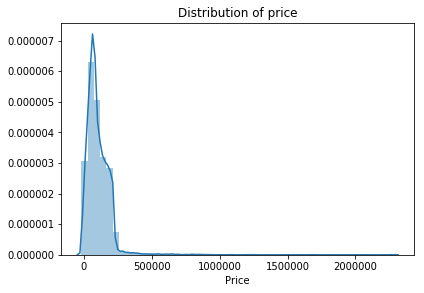

In [12]:
sns.distplot(df2.Price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

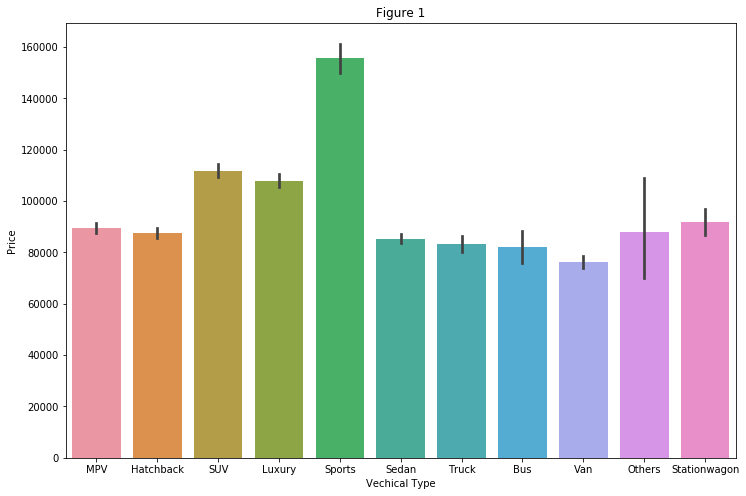

In [13]:
fig,axs=plt.subplots()
fig.set_size_inches(12,8)

p1=sns.barplot(x='Vechical Type',y='Price',data=df2,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

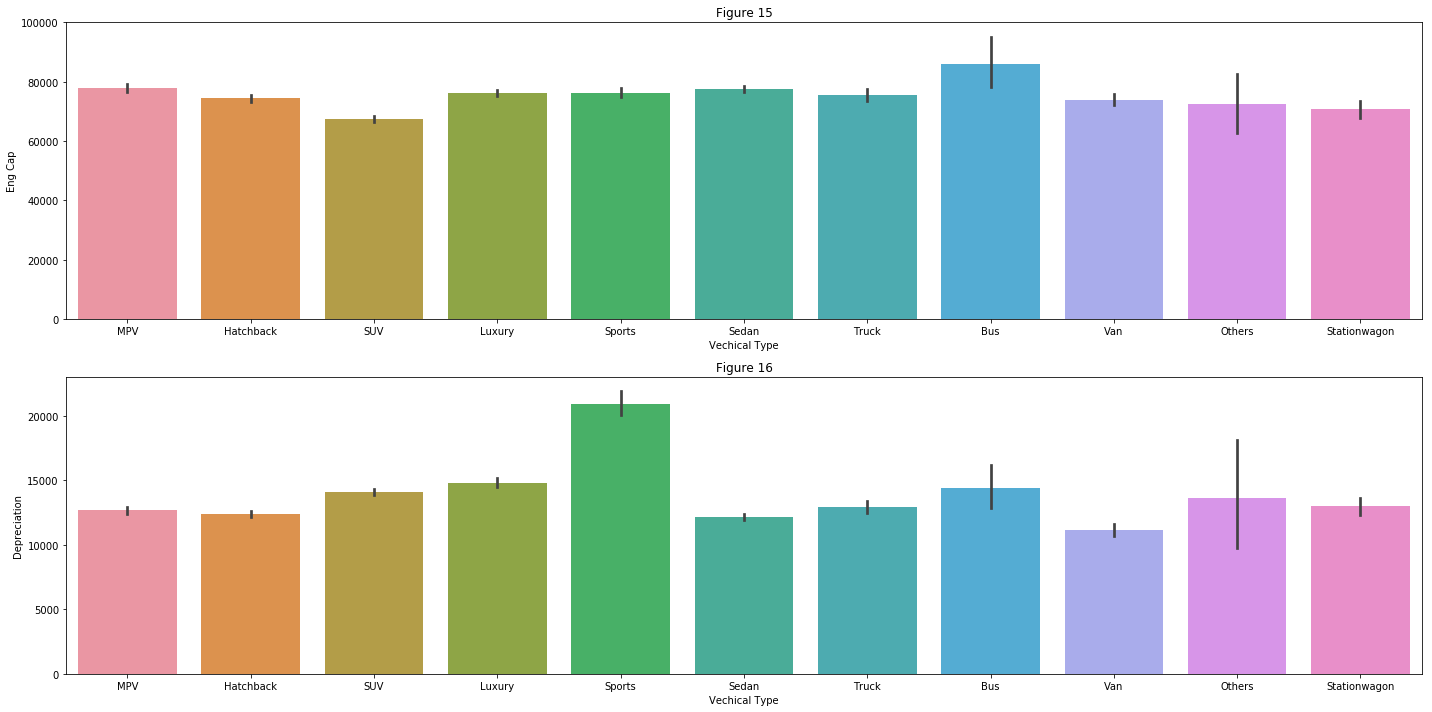

In [14]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='Vechical Type',y='Eng Cap',data=df2,ax=axs[0])
sns.barplot(x='Vechical Type',y='Depreciation',data=df2,ax=axs[1])
#axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('Figure 15')
axs[1].set_title('Figure 16')
plt.tight_layout()
plt.show()

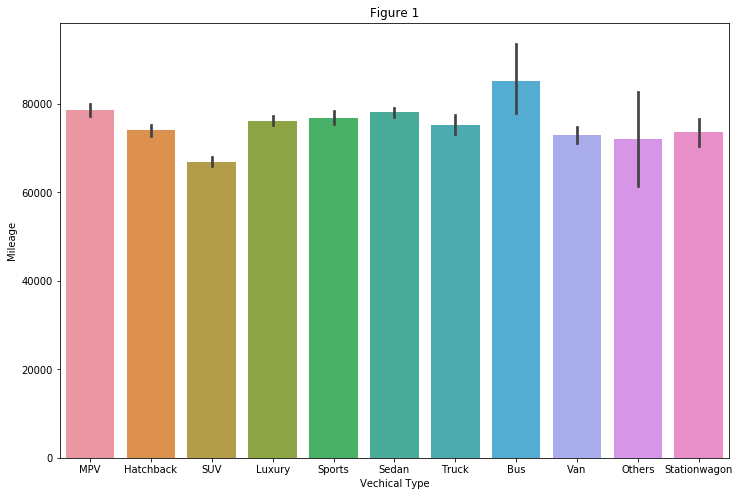

In [15]:
fig,axs=plt.subplots()
fig.set_size_inches(12,8)

p1=sns.barplot(x='Vechical Type',y='Mileage',data=df2,ax=axs)
axs.set_title('Figure 1')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()


### Data Modeling

In [16]:
#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



import warnings
warnings.filterwarnings('ignore')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-3ff1e2ed5da4>", line 16, in <module>
    from yellowbrick.regressor import AlphaSelection
ModuleNotFoundError: No module named 'yellowbrick'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda3/lib/

ModuleNotFoundError: No module named 'yellowbrick'

We can look into correaltion of Price attribute with other features

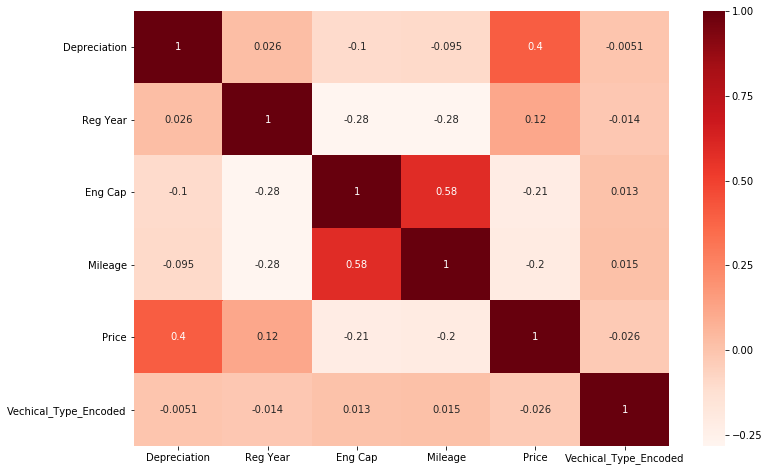

In [17]:
plt.figure(figsize=(12,8))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<font size = 3>Further Elaboration of Correlation:</font>

#### The correlation coefficient has values between -1 to 1.

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation 
* A value closer to -1 implies stronger negative correlation  

## Model Implementation
1)Linear Regression \
2)Ridge Regression \
3)Random Forest Regressor 

In [112]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['R2 Score','Accuracy(%)'])

### Divide the data set into Training set and Test set

In [45]:
df3 = df2[['Reg Year' ,'Eng Cap' ,'Mileage' ,'Depreciation' ,'Vechical_Type_Encoded','Price']]

In [46]:
import pandas as pd
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
df3 = clean_dataset(df3)

In [47]:
X = df3[['Reg Year' ,'Eng Cap' ,'Mileage' ,'Depreciation' ,'Vechical_Type_Encoded']]
y = df3['Price']

In [48]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.20336214, -0.86436395, -1.34714044,  0.2069819 , -1.42034311],
       [ 0.00569305,  0.60359305,  1.1171891 ,  1.12729843, -0.98664709],
       [ 0.63285859,  0.03276592,  0.03931255, -0.36426222, -0.55295107],
       [-1.03958286,  3.20355203,  3.21043642, -0.45594243, -0.11925505],
       [-0.6214725 ,  3.29153723,  3.29843099,  0.40432356, -0.11925505]])

In [49]:
#Divide the independent and dependent variables into training and testing sets(with 25% data for test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [64]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=[ 'R2 Score','Accuracy(%)'])

### Linear Regression

In [65]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [117]:
#calculating error/accuracy
r1_lr=result(y_test,y_pred)
print('Coefficients: \n', LR.coef_)
print("R2 Score : {} or {}%".format(r1_lr[0],r1_lr[1]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 5354.6458102  -8366.43352834 -7607.00731995 38623.96229129
 -1769.07420936]
R2 Score : -0.015252948575186442 or -1.5253%


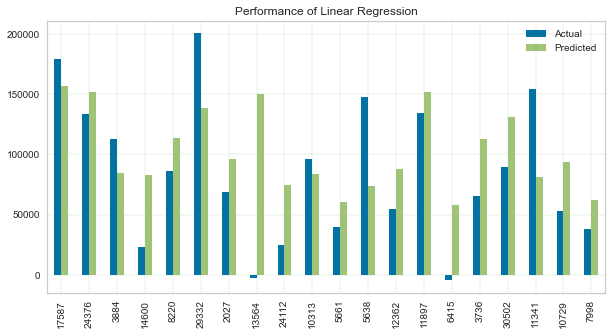

In [54]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### Random Forest

In [130]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred1 = RFR.predict(X_test)

In [131]:
r5_rf=result(y_test,y_pred1)
print("R2 Score : {} or {}%".format(r5_rf[0],r5_rf[1]))
accu['RandomForest Regressor']=r5_rf

R2 Score : 0.4409915941012391 or 44.0992%


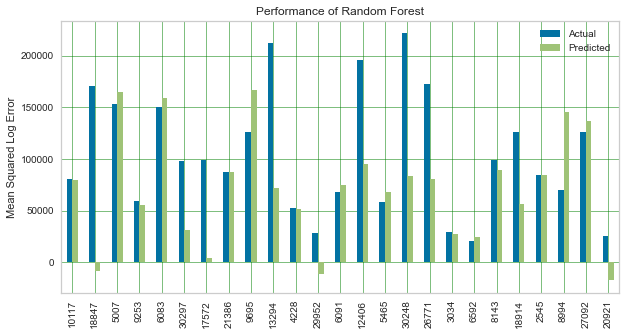

In [132]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

### Ridge regression

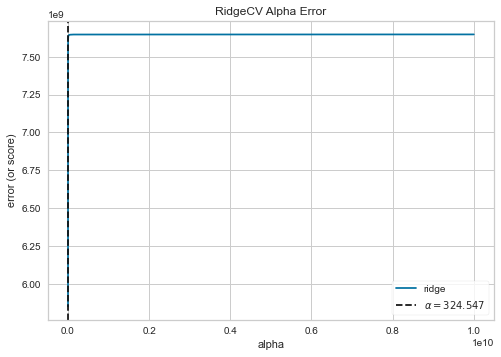

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [140]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
y_pred2 = visualizer.predict(X_test)
visualizer.show()

In [141]:
#model evaluation
r2_ridge=result(y_test,y_pred2)
print("R2 Score : {} or {}%".format(r2_ridge[0],r2_ridge[1]))
accu['Ridge Regression']=r2_ridge

R2 Score : 0.21057583447088457 or 21.0576%


In [142]:
accu.to_csv('errors.csv')

In [143]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,RandomForest Regressor,Ridge Regression
R2 Score,-0.015253,0.440992,0.210576
Accuracy(%),-1.525300,44.099200,21.057600


In [144]:
model_accuracy=accu.loc['Accuracy(%)']


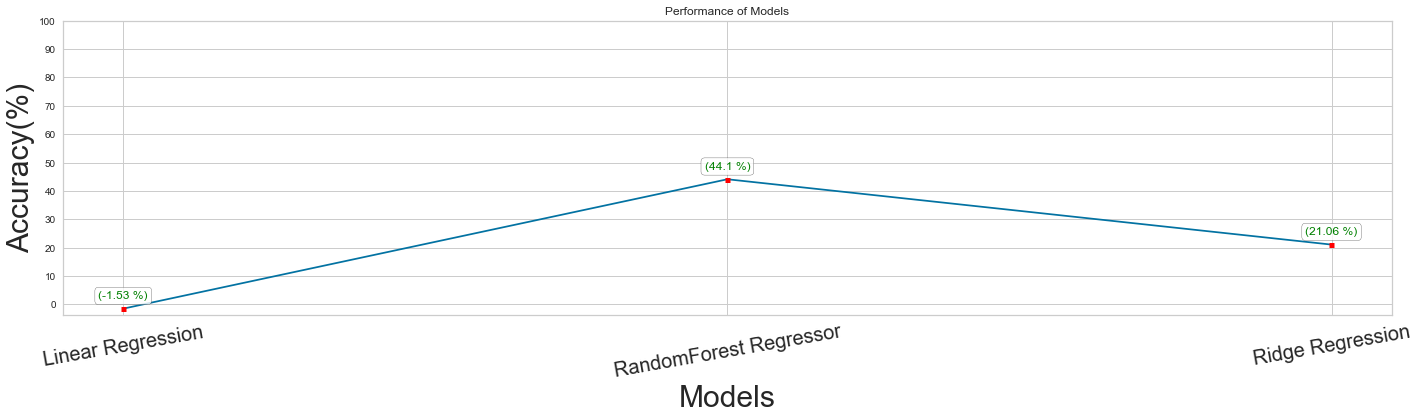

In [145]:

x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();


<center> <font size = 4> <b>THE END